# Aggregating columns together based on subcategory

### Pre-process data

#### Note: Importance values are from other notebooks

In [1]:
#Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn import metrics

from catboost import CatBoostRegressor, Pool

from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
data = r'/Users/OliverPan/Desktop/house/train.csv'

In [4]:
df = pd.read_csv(data)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Subcategory 1: Main Factors

In [6]:
new_main_df = df[['Id', "SalePrice", "OverallQual", "OverallCond", "LotArea", "YearBuilt", "Street", "LotShape"]]

In [7]:
new_main_df.head()

,Id,SalePrice,OverallQual,OverallCond,LotArea,YearBuilt,Street,LotShape
0,1,208500,7,5,8450,2003,Pave,Reg
1,2,181500,6,8,9600,1976,Pave,Reg
2,3,223500,7,5,11250,2001,Pave,IR1
3,4,140000,7,5,9550,1915,Pave,IR1
4,5,250000,8,5,14260,2000,Pave,IR1


In [8]:
#Feature importance from main_analysis_df
main_importance = pd.DataFrame()
main_importance["variable"] = ['OverallQual', 'LotArea', 'YearBuilt', 'LotShape']
main_importance["importance"] = [76.95991136103147, 18.75558088809967, 3.0246606935231912, 1.2598470573456726]
main_importance

,variable,importance
0,OverallQual,76.959911
1,LotArea,18.755581
2,YearBuilt,3.024661
3,LotShape,1.259847


##### Catboost Normalised RMSE: 0.06657866598719948

### Subcategory 2: Garage Details

In [9]:
garage_df = df[["Id", "SalePrice", "GarageType", "GarageYrBlt", "GarageFinish", "GarageCars", "GarageArea", "GarageQual", "GarageCond"]]

In [10]:
garage_df.head()

,Id,SalePrice,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,1,208500,Attchd,2003.0,RFn,2,548,TA,TA
1,2,181500,Attchd,1976.0,RFn,2,460,TA,TA
2,3,223500,Attchd,2001.0,RFn,2,608,TA,TA
3,4,140000,Detchd,1998.0,Unf,3,642,TA,TA
4,5,250000,Attchd,2000.0,RFn,3,836,TA,TA


In [11]:
garage_importance = pd.DataFrame()
garage_importance["variable"] = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
garage_importance["importance"] = [7.0372203818727534, 15.101076654321679, 16.594485367397123, 26.732025422742815, 33.54529737715993, 0.3450221588943238, 0.6448726376113748]
garage_importance

,variable,importance
0,GarageType,7.037220
1,GarageYrBlt,15.101077
2,GarageFinish,16.594485
3,GarageCars,26.732025
4,GarageArea,33.545297
5,GarageQual,0.345022
6,GarageCond,0.644873


##### Catboost Normalised RMSE: 0.09055755195766964

### Subcategory 3: Basement Details

In [12]:
basement_df = df[['Id', "SalePrice", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinSF1", "BsmtFinType2", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]

In [13]:
basement_df.head()

,Id,SalePrice,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
0,1,208500,Gd,TA,No,GLQ,706,Unf,0,150,856
1,2,181500,Gd,TA,Gd,ALQ,978,Unf,0,284,1262
2,3,223500,Gd,TA,Mn,GLQ,486,Unf,0,434,920
3,4,140000,TA,Gd,No,ALQ,216,Unf,0,540,756
4,5,250000,Gd,TA,Av,GLQ,655,Unf,0,490,1145


In [14]:
basement_importance = pd.DataFrame()
basement_importance["variable"] = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','TotalBsmtSF']
basement_importance["importance"] = [38.90071168327252, 1.5007923822496567, 8.373343396151819, 7.687886066966812, 43.537266471359175]
basement_importance

,variable,importance
0,BsmtQual,38.900712
1,BsmtCond,1.500792
2,BsmtExposure,8.373343
3,BsmtFinType1,7.687886
4,TotalBsmtSF,43.537266


##### Catboost Normalised RMSE: 0.07761983722416106

### Subcategory 4: Utilities

In [15]:
utilities_df = df[["SalePrice", "Utilities", "Heating", "HeatingQC", "CentralAir", "Electrical", "Fireplaces", "FireplaceQu"]]

In [16]:
utilities_df.head()

,SalePrice,Utilities,Heating,HeatingQC,CentralAir,Electrical,Fireplaces,FireplaceQu
0,208500,AllPub,GasA,Ex,Y,SBrkr,0,NaN
1,181500,AllPub,GasA,Ex,Y,SBrkr,1,TA
2,223500,AllPub,GasA,Ex,Y,SBrkr,1,TA
3,140000,AllPub,GasA,Gd,Y,SBrkr,1,Gd
4,250000,AllPub,GasA,Ex,Y,SBrkr,1,TA


In [17]:
utilities_importance = pd.DataFrame()
utilities_importance["variable"] = ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'Fireplaces', 'FireplaceQu']
utilities_importance["importance"] = [1.4827008116357552, 39.684940887098975, 2.595176412575824, 5.262203287408806, 11.978141353196063, 38.99683724808456]
utilities_importance

,variable,importance
0,Heating,1.482701
1,HeatingQC,39.684941
2,CentralAir,2.595176
3,Electrical,5.262203
4,Fireplaces,11.978141
5,FireplaceQu,38.996837


##### Catboost Normalised RMSE: 0.09698163274687885

### Subcategory 5: Miscellaneous

In [18]:
misc_df = df[["SalePrice", "MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]]

In [19]:
misc_df.head()

,SalePrice,MoSold,YrSold,SaleType,SaleCondition,Condition1,Condition2
0,208500,2,2008,WD,Normal,Norm,Norm
1,181500,5,2007,WD,Normal,Feedr,Norm
2,223500,9,2008,WD,Normal,Norm,Norm
3,140000,2,2006,WD,Abnorml,Norm,Norm
4,250000,12,2008,WD,Normal,Norm,Norm


In [20]:
misc_importance = pd.DataFrame()
misc_importance["variable"] = ["MoSold", "YrSold", "SaleType", "SaleCondition", "Condition1", "Condition2"]
misc_importance["importance"] = [0.673250258242363, 1.163618892900523, 10.767204900486272, 73.54024102192115, 13.85568492644969, 0.0]
misc_importance

,variable,importance
0,MoSold,0.673250
1,YrSold,1.163619
2,SaleType,10.767205
3,SaleCondition,73.540241
4,Condition1,13.855685
5,Condition2,0.000000


##### Catboost Normalised RMSE: 0.1162533727829413

In [21]:
### Subcategory 6: External Features

In [22]:
exterior_df = df[['SalePrice', 'LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']]

In [23]:
exterior_df.head()

,SalePrice,LandContour,LandSlope,Neighborhood,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond
0,208500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
1,181500,Lvl,Gtl,Veenker,Gable,CompShg,MetalSd,MetalSd,TA,TA
2,223500,Lvl,Gtl,CollgCr,Gable,CompShg,VinylSd,VinylSd,Gd,TA
3,140000,Lvl,Gtl,Crawfor,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA
4,250000,Lvl,Gtl,NoRidge,Gable,CompShg,VinylSd,VinylSd,Gd,TA


In [24]:
exterior_importance = pd.DataFrame()
exterior_importance["variable"] = ['LandContour', 'LandSlope', 'Neighborhood', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond']
exterior_importance["importance"] = [1.2835122533473295, 3.1009698819408307, 32.62214937360188, 6.673037642907108, 2.822641228551309, 4.494415714904176, 4.346209810404765, 42.543348483762145, 2.1137156105804675]
exterior_importance

,variable,importance
0,LandContour,1.283512
1,LandSlope,3.100970
2,Neighborhood,32.622149
3,RoofStyle,6.673038
4,RoofMatl,2.822641
5,Exterior1st,4.494416
6,Exterior2nd,4.346210
7,ExterQual,42.543348
8,ExterCond,2.113716


### Aggregate columns with higher feature importance

In [25]:
model_df = df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', 'FireplaceQu', 'SaleCondition', 'Neighborhood', 'ExterQual']]

In [26]:
model_df.head()

,SalePrice,OverallQual,LotArea,GarageYrBlt,GarageFinish,GarageCars,GarageArea,BsmtQual,TotalBsmtSF,HeatingQC,FireplaceQu,SaleCondition,Neighborhood,ExterQual
0,208500,7,8450,2003.0,RFn,2,548,Gd,856,Ex,NaN,Normal,CollgCr,Gd
1,181500,6,9600,1976.0,RFn,2,460,Gd,1262,Ex,TA,Normal,Veenker,TA
2,223500,7,11250,2001.0,RFn,2,608,Gd,920,Ex,TA,Normal,CollgCr,Gd
3,140000,7,9550,1998.0,Unf,3,642,TA,756,Gd,Gd,Abnorml,Crawfor,TA
4,250000,8,14260,2000.0,RFn,3,836,Gd,1145,Ex,TA,Normal,NoRidge,Gd


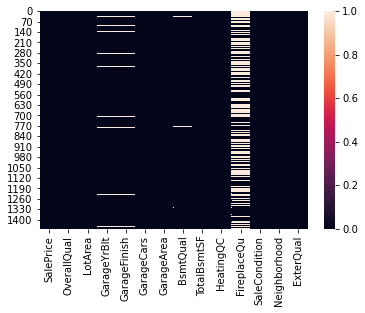

In [27]:
sns.heatmap(model_df.isnull())

In [28]:
#Converting to numerical values
model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
model_df["HeatingQC"] = model_df["HeatingQC"].astype('category').cat.codes
model_df["FireplaceQu"] = model_df["FireplaceQu"].astype('category').cat.codes
model_df["SaleCondition"] = model_df["SaleCondition"].astype('category').cat.codes
model_df["ExterQual"] = model_df["ExterQual"].astype('category').cat.codes
model_df["Neighborhood"] = model_df["Neighborhood"].astype('category').cat.codes

model_df = model_df.fillna(0)
model_df["GarageYrBlt"] = model_df["GarageYrBlt"].astype(int)

<ipython-input-28-6d166395fef2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["GarageFinish"] = model_df["GarageFinish"].astype('category').cat.codes
<ipython-input-28-6d166395fef2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df["BsmtQual"] = model_df["BsmtQual"].astype('category').cat.codes
<ipython-input-28-6d166395fef2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [29]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   SalePrice      1460 non-null   int64
 1   OverallQual    1460 non-null   int64
 2   LotArea        1460 non-null   int64
 3   GarageYrBlt    1460 non-null   int64
 4   GarageFinish   1460 non-null   int8 
 5   GarageCars     1460 non-null   int64
 6   GarageArea     1460 non-null   int64
 7   BsmtQual       1460 non-null   int8 
 8   TotalBsmtSF    1460 non-null   int64
 9   HeatingQC      1460 non-null   int8 
 10  FireplaceQu    1460 non-null   int8 
 11  SaleCondition  1460 non-null   int8 
 12  Neighborhood   1460 non-null   int8 
 13  ExterQual      1460 non-null   int8 
dtypes: int64(7), int8(7)
memory usage: 89.9 KB


In [44]:
model_df = model_df[['SalePrice', 'OverallQual', 'LotArea', 'GarageYrBlt']]

### CatBoost

In [45]:
X = model_df.drop(["SalePrice"], axis = 1)
y = model_df[["SalePrice"]]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 292 entries, 529 to 61
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  292 non-null    int64
 1   LotArea      292 non-null    int64
 2   GarageYrBlt  292 non-null    int64
dtypes: int64(3)
memory usage: 9.1 KB


In [33]:
# category = ["OverallQual", "GarageYrBlt", "GarageFinish", "GarageCars", "BsmtQual", "HeatingQC", "FireplaceQu", "SaleCondition", "Neighborhood", "ExterQual"]

In [48]:
category = ["OverallQual", "GarageYrBlt"]

In [49]:
cat_boost = CatBoostRegressor(depth=3, learning_rate=0.1, loss_function='RMSE')
cat_boost.fit(X_train, y_train, cat_features=category)

0:	learn: 73706.5519599	total: 2.28ms	remaining: 2.28s
1:	learn: 69585.6370999	total: 4.87ms	remaining: 2.43s
2:	learn: 66256.2605130	total: 7.23ms	remaining: 2.4s
3:	learn: 63060.6507793	total: 8.96ms	remaining: 2.23s
4:	learn: 60210.2689407	total: 10.5ms	remaining: 2.09s
5:	learn: 57610.3920346	total: 12.1ms	remaining: 2s
6:	learn: 55766.2368116	total: 13.6ms	remaining: 1.94s
7:	learn: 53972.8244180	total: 15.2ms	remaining: 1.88s
8:	learn: 52393.5033732	total: 16.8ms	remaining: 1.85s
9:	learn: 51263.3990199	total: 18.3ms	remaining: 1.81s
10:	learn: 49923.1392272	total: 19.9ms	remaining: 1.79s
11:	learn: 48756.0653526	total: 21.4ms	remaining: 1.76s
12:	learn: 47673.0488239	total: 23.8ms	remaining: 1.81s
13:	learn: 46577.2870789	total: 26.2ms	remaining: 1.84s
14:	learn: 45858.5861277	total: 27.9ms	remaining: 1.83s
15:	learn: 45111.3825895	total: 29.1ms	remaining: 1.79s
16:	learn: 44478.7563670	total: 31ms	remaining: 1.79s
17:	learn: 43807.4264493	total: 32.5ms	remaining: 1.77s
18:	lear

181:	learn: 34979.0767275	total: 178ms	remaining: 800ms
182:	learn: 34957.8868904	total: 179ms	remaining: 798ms
183:	learn: 34952.4956251	total: 180ms	remaining: 798ms
184:	learn: 34946.2682178	total: 181ms	remaining: 798ms
185:	learn: 34938.9986175	total: 183ms	remaining: 799ms
186:	learn: 34926.0943609	total: 184ms	remaining: 799ms
187:	learn: 34911.5090494	total: 185ms	remaining: 798ms
188:	learn: 34903.9492099	total: 186ms	remaining: 799ms
189:	learn: 34883.4437685	total: 188ms	remaining: 801ms
190:	learn: 34876.0248629	total: 189ms	remaining: 801ms
191:	learn: 34871.0249207	total: 191ms	remaining: 802ms
192:	learn: 34860.4735137	total: 192ms	remaining: 802ms
193:	learn: 34842.5624511	total: 193ms	remaining: 803ms
194:	learn: 34819.2481043	total: 195ms	remaining: 805ms
195:	learn: 34789.1611832	total: 196ms	remaining: 806ms
196:	learn: 34765.1924515	total: 198ms	remaining: 807ms
197:	learn: 34761.3911286	total: 200ms	remaining: 809ms
198:	learn: 34733.3285681	total: 202ms	remaining

524:	learn: 31342.3345225	total: 527ms	remaining: 477ms
525:	learn: 31341.9402278	total: 528ms	remaining: 476ms
526:	learn: 31332.6079611	total: 529ms	remaining: 475ms
527:	learn: 31326.3015212	total: 531ms	remaining: 474ms
528:	learn: 31311.3034373	total: 532ms	remaining: 474ms
529:	learn: 31309.1550268	total: 533ms	remaining: 473ms
530:	learn: 31304.1224835	total: 535ms	remaining: 472ms
531:	learn: 31302.9499386	total: 536ms	remaining: 472ms
532:	learn: 31270.8481372	total: 538ms	remaining: 471ms
533:	learn: 31269.9462004	total: 539ms	remaining: 471ms
534:	learn: 31261.2752483	total: 541ms	remaining: 470ms
535:	learn: 31259.6563700	total: 542ms	remaining: 469ms
536:	learn: 31243.1732052	total: 543ms	remaining: 468ms
537:	learn: 31241.4545892	total: 545ms	remaining: 468ms
538:	learn: 31239.3115931	total: 546ms	remaining: 467ms
539:	learn: 31233.9891285	total: 548ms	remaining: 466ms
540:	learn: 31230.5414813	total: 549ms	remaining: 466ms
541:	learn: 31221.2933583	total: 550ms	remaining

747:	learn: 29842.0656799	total: 887ms	remaining: 299ms
748:	learn: 29838.5410293	total: 889ms	remaining: 298ms
749:	learn: 29832.4828677	total: 891ms	remaining: 297ms
750:	learn: 29824.3820077	total: 892ms	remaining: 296ms
751:	learn: 29819.7528790	total: 894ms	remaining: 295ms
752:	learn: 29814.6311131	total: 896ms	remaining: 294ms
753:	learn: 29806.6117050	total: 898ms	remaining: 293ms
754:	learn: 29791.2673165	total: 901ms	remaining: 292ms
755:	learn: 29784.4165284	total: 904ms	remaining: 292ms
756:	learn: 29781.1456257	total: 906ms	remaining: 291ms
757:	learn: 29777.3021790	total: 908ms	remaining: 290ms
758:	learn: 29768.5784954	total: 910ms	remaining: 289ms
759:	learn: 29764.0661661	total: 913ms	remaining: 288ms
760:	learn: 29762.1622701	total: 917ms	remaining: 288ms
761:	learn: 29757.0703505	total: 919ms	remaining: 287ms
762:	learn: 29754.2659951	total: 921ms	remaining: 286ms
763:	learn: 29736.7119052	total: 924ms	remaining: 285ms
764:	learn: 29733.0379146	total: 927ms	remaining

951:	learn: 28716.0401985	total: 1.24s	remaining: 62.8ms
952:	learn: 28710.3577109	total: 1.25s	remaining: 61.5ms
953:	learn: 28705.1254524	total: 1.25s	remaining: 60.2ms
954:	learn: 28704.4235988	total: 1.25s	remaining: 58.9ms
955:	learn: 28700.1458601	total: 1.25s	remaining: 57.6ms
956:	learn: 28697.6528430	total: 1.25s	remaining: 56.3ms
957:	learn: 28695.0418208	total: 1.25s	remaining: 55ms
958:	learn: 28691.3469136	total: 1.26s	remaining: 53.7ms
959:	learn: 28685.2495286	total: 1.26s	remaining: 52.5ms
960:	learn: 28670.0645753	total: 1.26s	remaining: 51.2ms
961:	learn: 28659.2320219	total: 1.26s	remaining: 49.9ms
962:	learn: 28655.0484904	total: 1.26s	remaining: 48.6ms
963:	learn: 28653.9447969	total: 1.27s	remaining: 47.3ms
964:	learn: 28642.1078344	total: 1.27s	remaining: 46ms
965:	learn: 28640.3803713	total: 1.27s	remaining: 44.7ms
966:	learn: 28639.2873310	total: 1.27s	remaining: 43.4ms
967:	learn: 28636.0409409	total: 1.27s	remaining: 42.1ms
968:	learn: 28632.6208938	total: 1.

In [50]:
y_pred = cat_boost.predict(X_test)

In [51]:
#Results using regressor
df = pd.DataFrame({'Actual': y_test["SalePrice"].to_list(), 'Predicted': list(y_pred.flatten())})
df.head()

,Actual,Predicted
0,200624,227377.895712
1,133000,151247.876735
2,110000,115645.897691
3,192000,197499.458514
4,88000,99390.574751


In [52]:
## We should also look at RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

48204.93521066139

In [53]:
## Normalised RMSE
sqrt(mean_squared_error(y_test, y_pred)) / (y_test["SalePrice"].max() - y_test["SalePrice"].min())

0.07109872449950057

In [54]:
new_main_df.drop(["SalePrice"], axis = 1).columns.values

array(['Id', 'OverallQual', 'OverallCond', 'LotArea', 'YearBuilt',
       'Street', 'LotShape'], dtype=object)

In [55]:
list(cat_boost.get_feature_importance(Pool(X_test, label = y_test, cat_features=category)))

[70.91678751420153, 19.768901993605297, 9.314310492193204]

#### We can see that the model is not predicting the higher Actual value houses very well. There might be additional features that we can include to help with higher valued houses

In [56]:
df[df["Actual"] > 400000]

,Actual,Predicted
8,745000,427592.473315
44,403000,305105.542274
50,412500,357532.541946
126,415298,353582.767814
253,438780,423468.658893
258,538000,338604.911054
288,555000,419200.796708


### Deploy model

In [57]:
import pickle 
pickle_out = open("catboost.pkl", "wb") 
pickle.dump(cat_boost, pickle_out) 
pickle_out.close()